In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter

In [7]:
from matplotlib.colors import LinearSegmentedColormap

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):

    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

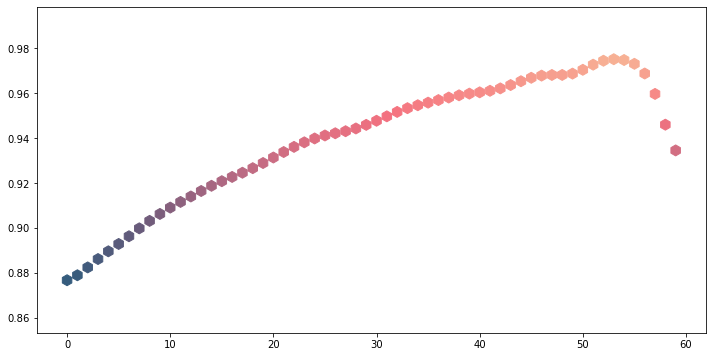

In [8]:
perf = np.load('/Users/GA/Documents/Dayan_lab/Code/Eran_python/Fit_params/contours/perf_matrix_two.npy')
perf = gaussian_filter(perf, 1.5)
hex_list = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'][::-1]

fig = plt.figure(figsize=(12, 6))
plt.scatter(np.arange(60), perf[57, :], c=perf[57, :], marker='h', s=120, cmap=get_continuous_cmap(hex_list))
# plt.savefig('/Users/GA/Documents/Dayan_lab/Paper/Figures_data/Figure2/top.svg', format='svg', transparent=True)

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 6 Text yticklabel objects>)

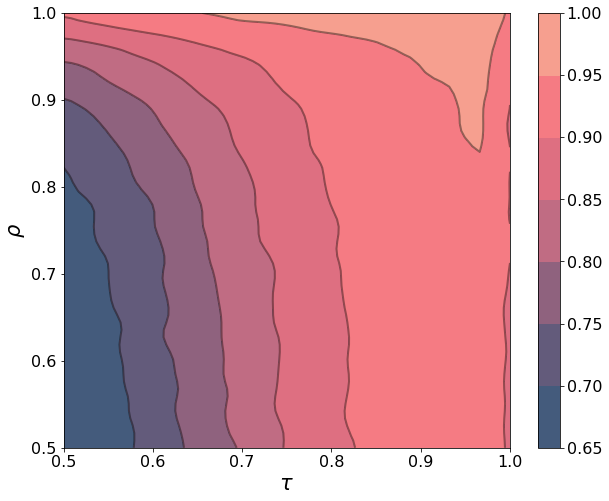

In [10]:
fig = plt.figure(figsize=(10, 8))

x = np.linspace(0.5, 1, 60)
y = np.linspace(0.5, 1, 60)

X, Y = np.meshgrid(y, x)

plt.contourf(X, Y, perf, 6, cmap=get_continuous_cmap(hex_list))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.contour(X, Y, perf, 6, colors=['k']*7, linewidths=2, alpha=0.4)
plt.xlabel(r'$\tau$', fontsize=21);
plt.ylabel(r'$\rho$', fontsize=21);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title(r'Steady-state performace. $\beta=1.5, \alpha=0.62$', fontsize=20)
# plt.savefig('/Users/GA/Documents/Dayan_lab/Paper/Figures_data/Figure2/Performace.svg', format='svg', transparent=True)

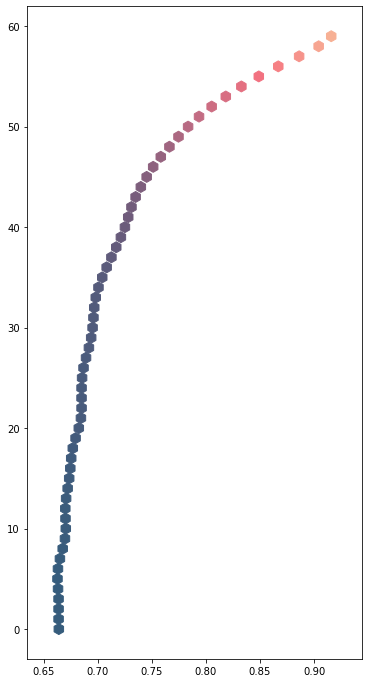

In [11]:
fig = plt.figure(figsize=(6, 12))
plt.scatter(perf[:, 3], np.arange(60), c=perf[:, 3], marker='h', s=120, cmap=get_continuous_cmap(hex_list))
# plt.savefig('/Users/GA/Documents/Dayan_lab/Paper/Figures_data/Figure2/left.svg', format='svg', transparent=True)